<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [263]:
import matplotlib.pyplot as plt

% matplotlib inline

In [264]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [265]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [266]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [242]:
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [243]:
print(X.dtypes)
print(y.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object
MEDV    float64
dtype: object


In [244]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [245]:
y.isnull().sum()

MEDV    0
dtype: int64

In [246]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [247]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [248]:
feature_cols = list(X.columns)
for var in feature_cols:
    print(var, 'no. of unique values', len(X.loc[:,var].unique()))


CRIM no. of unique values 504
ZN no. of unique values 26
INDUS no. of unique values 76
CHAS no. of unique values 2
NOX no. of unique values 81
RM no. of unique values 446
AGE no. of unique values 356
DIS no. of unique values 412
RAD no. of unique values 9
TAX no. of unique values 66
PTRATIO no. of unique values 46
B no. of unique values 357
LSTAT no. of unique values 455


In [249]:
print('MEDV', 'no. of unique values', len(y.loc[:,'MEDV'].unique()))

MEDV no. of unique values 229


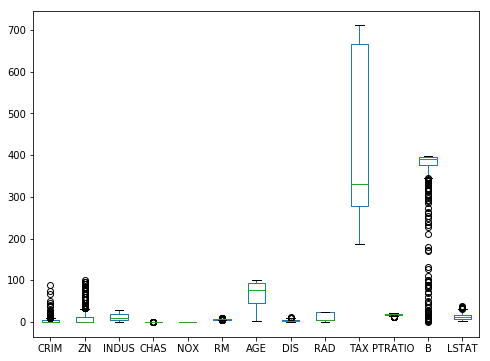

In [250]:
ax = X.plot(kind='box', figsize = (8,6))

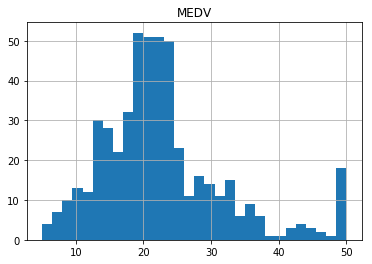

In [251]:
ax2 = y.hist(bins=30)

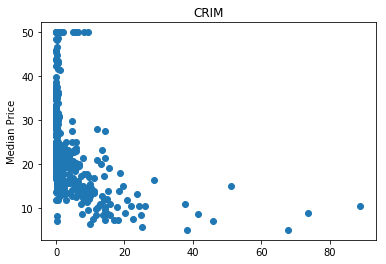

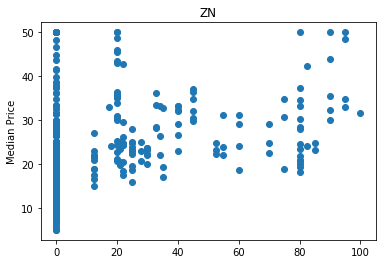

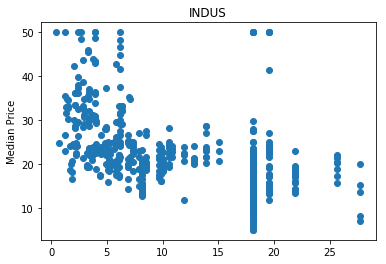

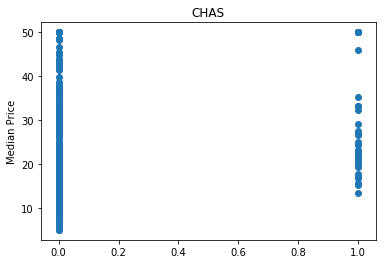

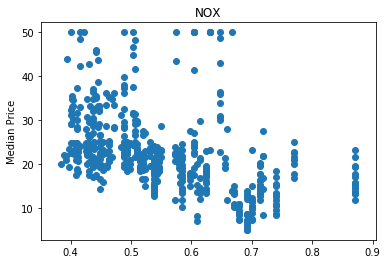

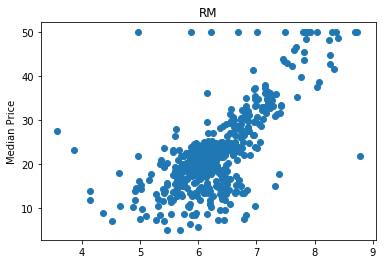

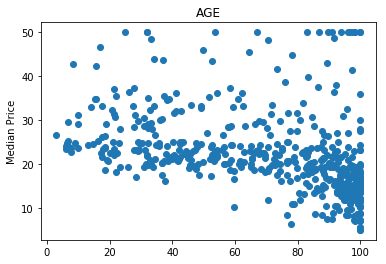

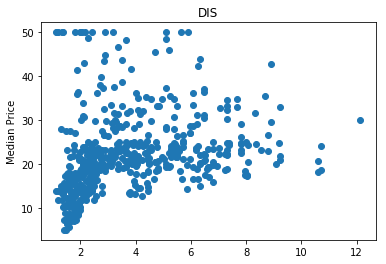

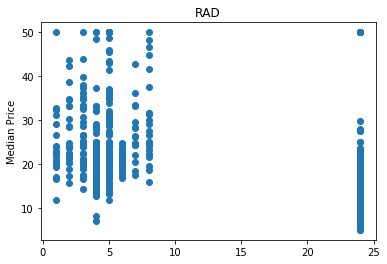

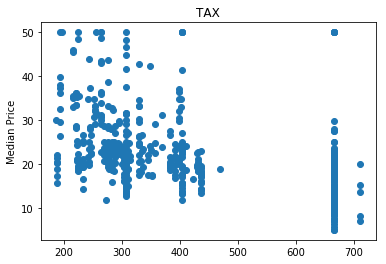

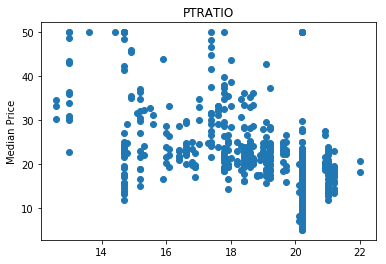

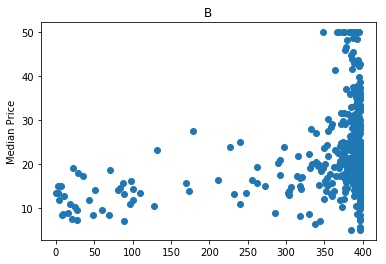

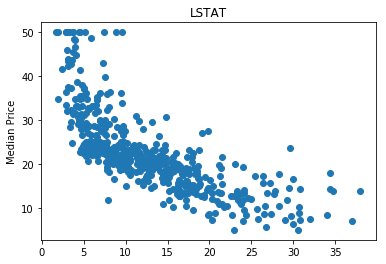

In [252]:

for var in feature_cols:
    x = X.loc[:,var]
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    ax.set_title(var)
    ax.set_ylabel('Median Price')

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [267]:
from sklearn import metrics
null_pred = np.zeros(len(y)) + np.mean(y.loc[:,'MEDV'])
null_mse = metrics.mean_squared_error(y, null_pred)
null_mse

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
    
y_pred = linreg.predict(X_test)
mse_test = metrics.mean_squared_error(y_test, y_pred) #mse on 30% test set
mse_train = metrics.mean_squared_error(y_train, linreg.predict(X_train)) #mse on 70% train set

print(mse_test, 'MSE on 30% test set')
print(mse_train, 'MSE on 70% training set')


28.37644965546681 MSE on 30% test set
20.19770234867637 MSE on 70% training set


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [269]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=10, shuffle=True)

print(-cross_val_score(linreg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean(),'cross-val score on training set')
print(-cross_val_score(linreg, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean(),'cross-val score on test set')

23.359686021412518 cross-val score on training set
25.98831363919384 cross-val score on test set


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

MSE on training set is ~ 23 vs. null model MSE of 84. Therefore, model performs much better on training set compared to null model. This is an expected result because model was fit based on the training set- doesn't tell us much yet about variance without examining performance on test set or out of sample data, but does indicate bias is not very high (otherwise MSE on training set may have been higher than that from null model). 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

MSE on training set is 23 vs. slightly higher, 26, for test set. Therefore, model performs better on training set than on test set. This is again expected for the reasons described above. Indicates variance could be reduced further by optimizing model complexity - this would improve out of sample performance of model and reduce gap between test and training set MSEs. 

- How much of a bias problem does your model appear to have? Why do you say that?

Does not appear to have a major bias problem since MSE from training set is much better than MSE of a null model - therefore, our model does appear to match the data somewhat effectively. 

- How much of a variance problem does your model appear to have? Why do you say that?

Does not appear to have major variance problem either, since MSEs on training and test sets are fairly close together - if very high variance, would expect MSE on training set to be much lower than that on test set. Still some variance since the error on the test set is higher than that on training set.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [270]:
#want to reduce test set MSE by reducing variance.
#Remove variables that appear noisy/not linear in median price/have very high variation. Exclude 'TAX' based on box and scatter plots above. 

X.drop(['TAX'],axis=1,inplace=True)
X.shape

(506, 12)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
X_test.shape


(152, 12)

In [272]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
    
y_pred = linreg.predict(X_test)
kf = model_selection.KFold(n_splits=10, shuffle=True)

print(-cross_val_score(linreg, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean(),'cross-val score on test set')

26.97205150262199 cross-val score on test set


Slight increase in test-set MSE from excluding TAX (opposite to desired effect).
Try dropping 'B' variable as well (lots of outliers)

In [273]:
X.drop(['B'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
    
y_pred = linreg.predict(X_test)
kf = model_selection.KFold(n_splits=10, shuffle=True)
print(-cross_val_score(linreg, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean(),'cross-val score on test set')

29.27486074976274 cross-val score on test set


test-set MSE increases again, i.e. model is getting worse - opposite to desired effect. Try transforming variables instead.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

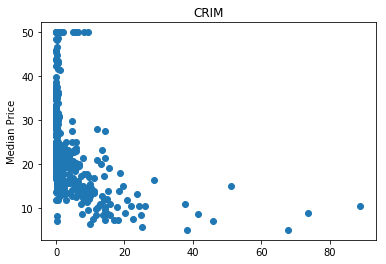

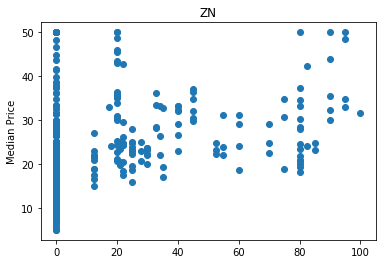

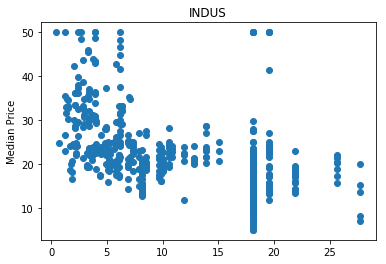

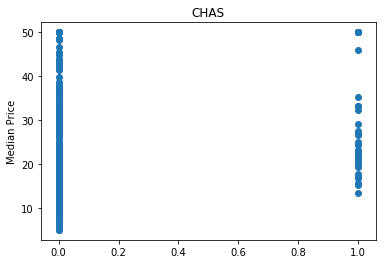

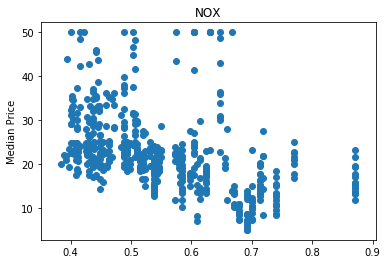

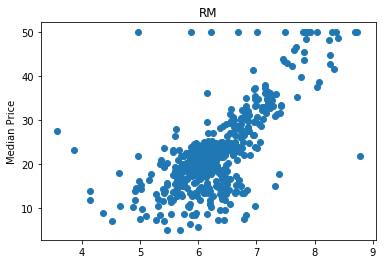

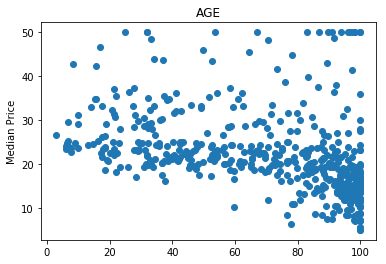

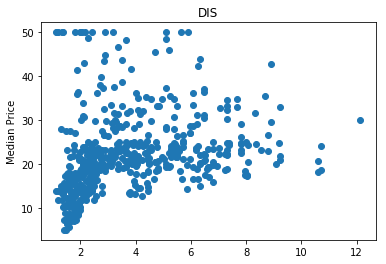

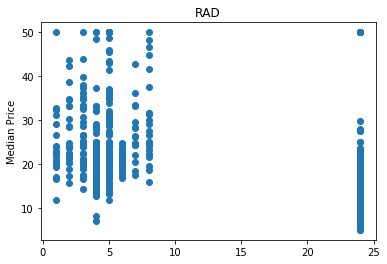

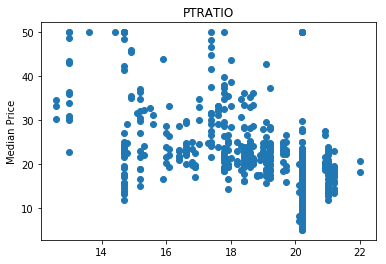

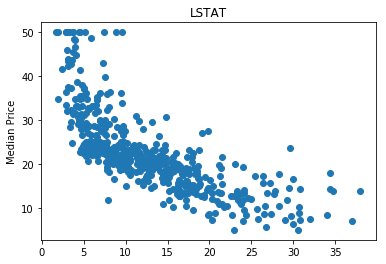

In [274]:
feature_cols = list(X.columns)
for var in feature_cols:
    x = X.loc[:,var]
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    ax.set_title(var)
    ax.set_ylabel('Median Price')

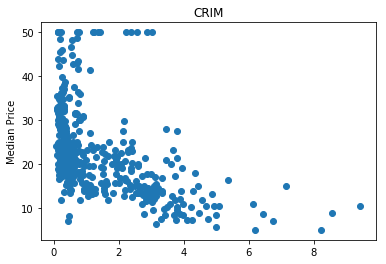

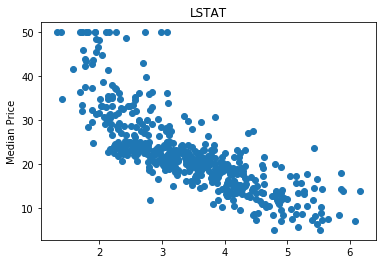

In [275]:
#try taking square root of CRIM and LSTAT - makes relationship with median price slightly more linear

for var in ['CRIM','LSTAT']:
    x = (X.loc[:,var])**(1/2)
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    ax.set_title(var)
    ax.set_ylabel('Median Price')

In [276]:
X.loc[:,'CRIM_SQ'] = X.loc[:,'CRIM']**(1/2)
X.loc[:,'LSTAT_SQ'] = X.loc[:,'LSTAT']**(1/2)

X.drop(['CRIM','LSTAT'],axis=1,inplace=True)
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
print(X_test.shape)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
    
y_pred = linreg.predict(X_test)
kf = model_selection.KFold(n_splits=10, shuffle=True)
print(-cross_val_score(linreg, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean(),'cross-val score on test set')

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO',
       'CRIM_SQ', 'LSTAT_SQ'],
      dtype='object')
(152, 11)
25.458669135530712 cross-val score on test set


Test-set MSE decreases to 25.4 with this transformation, lower than original value and closer to training-set MSE.

# KNN Practice

In [75]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [76]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [77]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [186]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [187]:
iris.loc[:,'species_num'] = iris.loc[:,'species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [191]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [192]:
iris.shape

(150, 6)

In [193]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [194]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [195]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [197]:
feature_cols = list(iris.columns)
for var in feature_cols:
    print(var, 'no. of unique values', len(iris.loc[:,var].unique()))

sepal_length no. of unique values 35
sepal_width no. of unique values 23
petal_length no. of unique values 43
petal_width no. of unique values 22
species no. of unique values 3
species_num no. of unique values 3


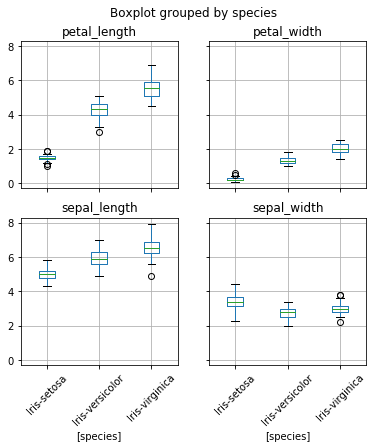

In [200]:
ax = iris.drop('species_num', axis=1).boxplot(by='species', rot=45, figsize=(6,6))

- Get the accuracy of a null model that simply predicts the most common species.

In [203]:
y = iris.loc[:,'species_num']
X = iris.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
most_common_species = y.value_counts().sort_values(ascending=False).index[0]
print(most_common_species, 'most common species_num')
(y == most_common_species).mean()

0 most common species_num


0.3333333333333333

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [206]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99,shuffle=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)

kf = model_selection.KFold(n_splits=10, shuffle=True)

print(cross_val_score(knn, X_test_std, y_test, cv=kf, scoring='accuracy').mean(), 'test data accuracy')
print(cross_val_score(knn, X_train_std, y_train, cv=kf, scoring='accuracy').mean(), 'training data accuracy')


0.9 test data accuracy
0.9651515151515152 training data accuracy


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Model performed much better on training set compared to null model (accuracy score of 0.965 vs. 0.33). Model likely has low bias. Cannot infer variance unless we evaluate accuracy on test set vs. training set. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Model performed slightly worse on test set relative to training set (accuracy score of 0.9 vs. 0.965). Indicates variance could be further reduced by optimizing model complexity (i.e. adjusting k). 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Appears to have more of variance problem since training accuracy is relatively high (indicating low bias) but test accuracy is lower than training accuracy (indicating potential over fitting and higher variance).

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [229]:
#Adjust k to reduce model complexity and reduce variance - i.e. should increase k 

#Try k = 15.

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)

kf = model_selection.KFold(n_splits=10, shuffle=True)
print(cross_val_score(knn, X_test_std, y_test, cv=kf, scoring='accuracy').mean(), 'test data accuracy')
print(cross_val_score(knn, X_train_std, y_train, cv=kf, scoring='accuracy').mean(), 'training data accuracy')

#below shows that test data accuracy increases slightly when we increase k to 15, to 0.92, but is still lower than training accuracy (as expected)

0.9166666666666666 test data accuracy
0.9553030303030303 training data accuracy


- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [231]:
len(y_train)

112

In [233]:
test_scores = []

for k in range(1,35):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    kf = model_selection.KFold(n_splits=10, shuffle=True)
    test_accuracy = cross_val_score(knn, X_test_std, y_test, cv=kf, scoring='accuracy').mean()
    test_scores.append(test_accuracy)
test_scores
#below shows that test score accuracy does not increase as k gets larger

[0.875,
 0.9166666666666666,
 0.9166666666666666,
 0.925,
 0.9416666666666667,
 0.9166666666666666,
 0.9,
 0.95,
 0.925,
 0.9,
 0.95,
 0.925,
 0.8833333333333332,
 0.8666666666666668,
 0.85,
 0.8333333333333333,
 0.8666666666666668,
 0.7833333333333333,
 0.7333333333333333,
 0.6,
 0.575,
 0.5416666666666667,
 0.425,
 0.4083333333333333,
 0.4,
 0.4666666666666667,
 0.425,
 0.4166666666666667,
 0.35833333333333334,
 0.36666666666666664,
 0.3666666666666667,
 0.375,
 0.30833333333333335,
 0.325]

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

In [237]:
# Create new variable, petal area, which is a mulitiplicative function of petal length and width and reduce no. of neighbors to 5
iris.loc[:, 'petal_area'] = iris.loc[:, 'petal_length']/2 * iris.loc[:, 'petal_width']/2 * 3.14

feature_cols = ['petal_area', 'sepal_length', 'sepal_width']
X = iris.loc[:,feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99,shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)

kf = model_selection.KFold(n_splits=10, shuffle=True)

print(cross_val_score(knn, X_test_std, y_test, cv=kf, scoring='accuracy').mean(), 'test data accuracy')
print(cross_val_score(knn, X_train_std, y_train, cv=kf, scoring='accuracy').mean(), 'training data accuracy')

#test data accuracy now improves to 0.95, ~ same as training set accuracy.

0.95 test data accuracy
0.9545454545454545 training data accuracy


## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [7]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
